# Data Exploration on MovieLens25M Data

## Initialize

### Download the dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH" -O ../data/MovieLens25M/genome-scores.csv && rm -rf /tmp/cookies.txt
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH' -O ../data/MovieLens25M/genome-scores.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BXpm5PhinwhoD9x8wgiM-H7IjHD1NxDc' -O ../data/MovieLens25M/genome-tags.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sDu8Tk2Ut9ytMT2lgmokKw3Zx4T9BX5T' -O ../data/MovieLens25M/links.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1j6gwSxbeOBULLdKbVVBw0QbRHAO_JXLv' -O ../data/MovieLens25M/movies.csv
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ" -O ../data/MovieLens25M/ratings.csv && rm -rf /tmp/cookies.txt
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ' -O ../data/MovieLens25M/ratings.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LVAaiQv9XE8pV8k3wU9RAhbWH-xOCqU3' -O ../data/MovieLens25M/tags.csv

### Import Libraries

In [133]:
import warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings('ignore', category=FutureWarning)

In [134]:
# define the paths
data_path = '../data/MovieLens25M/'

In [135]:
df_rating = pd.read_csv(data_path+'ratings.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


Check whether the rating file contains null data

In [136]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [137]:
df_rating['timestamp'] = pd.to_datetime(df_rating['timestamp'],unit='s').dt.date

In [138]:
df_rating.rename(columns={'timestamp': 'date'}, inplace=True)
df_rating.head()

,userId,movieId,rating,date
0,1,296,5.0,2006-05-17
1,1,306,3.5,2006-05-17
2,1,307,5.0,2006-05-17
3,1,665,5.0,2006-05-17
4,1,899,3.5,2006-05-17


In [139]:
df_movies = pd.read_csv(data_path+'movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [140]:
df_movies_rating = pd.merge(left=df_movies, right=df_rating, on='movieId')
df_movies_rating.head()

,movieId,title,genres,userId,rating,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,2006-03-03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,2015-08-13
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,2019-11-16
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1997-03-17
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1998-03-21


In [141]:
df_movies_rating['title'][0][0:-7]

'Toy Story'

In [142]:
moviesYear = []
for title in df_movies_rating['title']:
    if len(title) > 7 and title[-6] == '(' and title[-1] == ')':
        moviesYear.append(int(title[-5:-1]))
    else: 
        moviesYear.append(None)


In [143]:
# for i, year in enumerate(moviesYear):
#     if year != None:
#         df_movies_rating.at[i,'title'] = df_movies_rating['title'][i][0:-7]

In [144]:
df_movies_rating['movieYear'] = moviesYear

In [145]:
moviesYear.count(None)

13495

In [158]:
df_movies_rating['movieYear'].isna().sum()

13495

In [154]:
df_movies_rating[df_movies_rating['movieYear'] == "NaN"]

,movieId,title,genres,userId,rating,date,movieYear


In [161]:
df_movies_rating.head()

,movieId,title,genres,userId,rating,date,movieYear
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,2006-03-03,1995.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,2015-08-13,1995.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,2019-11-16,1995.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1997-03-17,1995.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1998-03-21,1995.0


In [162]:
df_movies_rating_dropna=df_movies_rating.dropna()

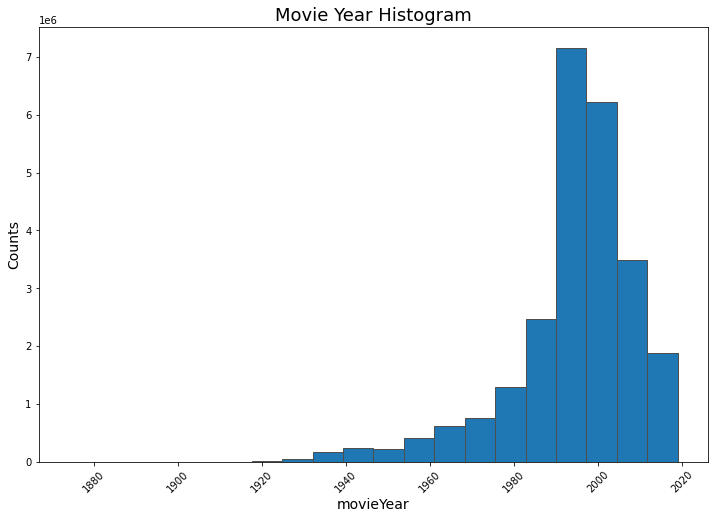

In [201]:
plt.figure(figsize=(12,8))
plt.title('Movie Year Histogram', fontsize=18)
plt.xlabel('movieYear', fontsize=14)
plt.ylabel('Counts', fontsize=14)
ax.set_title(title, fontsize=24, pad=20)
plt.hist(df_movies_rating_dropna['movieYear'], bins=20, ec='#4f4f4f')
plt.xticks(rotation=45)

plt.show()

In [205]:
int(df_movies_rating_dropna['movieYear'].mean())

1994

In [206]:
df_movies_rating['movieYear'].fillna(int(df_movies_rating['movieYear'].mean()), inplace=True)

In [207]:
df_movies_rating['movieYear'].isna().sum()

0

In [250]:
df_movies_rating['genres'][:1000].str.split('|').tolist()

0      [Adventure, Animation, Children, Comedy, Fantasy]
1      [Adventure, Animation, Children, Comedy, Fantasy]
2      [Adventure, Animation, Children, Comedy, Fantasy]
3      [Adventure, Animation, Children, Comedy, Fantasy]
4      [Adventure, Animation, Children, Comedy, Fantasy]
                             ...                        
995    [Adventure, Animation, Children, Comedy, Fantasy]
996    [Adventure, Animation, Children, Comedy, Fantasy]
997    [Adventure, Animation, Children, Comedy, Fantasy]
998    [Adventure, Animation, Children, Comedy, Fantasy]
999    [Adventure, Animation, Children, Comedy, Fantasy]
Name: genres, Length: 1000, dtype: object

In [251]:

df_genre = pd.DataFrame(df_movies_rating['genres'].str.split('|').tolist(), index=df_movies_rating['movieId']).stack()
df_genre = df_genre.reset_index([0, 'movieId'])
df_genre.columns = ['movieId', 'genre']

In [254]:
df_genre

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
67809881,209163,Drama
67809882,209169,(no genres listed)
67809883,209171,Action
67809884,209171,Adventure


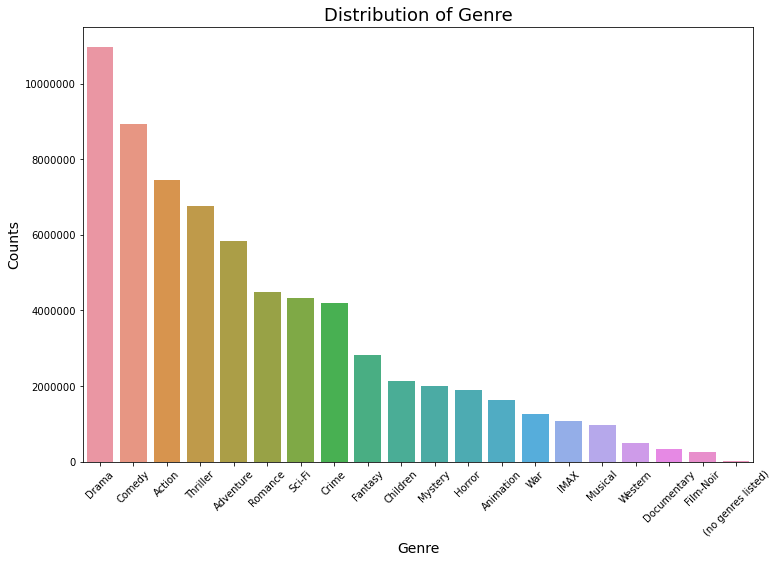

In [255]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='genre', data=df_genre, order = df_genre['genre'].value_counts().index)
# ax = sns.countplot(x='Genre', data=genre_df[:100], order = genre_df['Genre'].value_counts().index)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Distribution of Genre', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [222]:
group_by_genre = genre_df.groupby('genre')
group_by_genre.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
61233890,83773,(no genres listed)
61233891,83773,(no genres listed)
61293389,84768,(no genres listed)
61293390,84768,(no genres listed)


In [224]:
genre_counts = group_by_genre.count()
genre_counts

,movieId
Genre,
(no genres listed),26627
Action,7446918
Adventure,5832424
Animation,1630987
Children,2124258
Comedy,8926230
Crime,4190259
Documentary,322449
Drama,10962833


In [225]:

# print(rating_counts)
genres = genre_counts['movieId']
print(genres)
# ratings.describe()

Genre
(no genres listed)       26627
Action                 7446918
Adventure              5832424
Animation              1630987
Children               2124258
Comedy                 8926230
Crime                  4190259
Documentary             322449
Drama                 10962833
Fantasy                2831585
Film-Noir               247227
Horror                 1892183
IMAX                   1063279
Musical                 964252
Mystery                2010995
Romance                4497291
Sci-Fi                 4325740
Thriller               6763272
War                    1267346
Western                 483731
Name: movieId, dtype: int64


## Exploration

In [6]:
data_path

'../data/MovieLens25M/'

In this section, we will find the number of users, ratings, unique dates and movies in the dataset

In [7]:
numOfMovies = df_rating['movieId'].nunique()
numOfUsers = df_rating['userId'].nunique()
numOfRatings = len(df_rating)

In [8]:
print(f"Number of movies been rated: {numOfMovies}")
print(f"Number of users have rated at least one movie: {numOfUsers}")
print(f"Number of ratings: {numOfRatings}")

Number of movies been rated: 59047
Number of users have rated at least one movie: 162541
Number of ratings: 25000095


In [9]:
group_by_rating = df_rating.groupby('rating')
rating_counts = group_by_rating.count()
# print(rating_counts)
ratings = rating_counts['movieId']
print(ratings)
# ratings.describe()

rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
Name: movieId, dtype: int64


In [18]:
df_rating['rating'].describe()[1:]

mean    3.533854
std     1.060744
min     0.500000
25%     3.000000
50%     3.500000
75%     4.000000
max     5.000000
Name: rating, dtype: float64

rating
0.5     1.572266
1.0     3.107248
1.5     1.597954
2.0     6.563447
2.5     5.051169
3.0    19.587638
3.5    12.709224
4.0    26.559091
4.5     8.802123
5.0    14.449841
Name: movieId, dtype: float64


<AxesSubplot:title={'center':'Percentage of each rating'}, xlabel='rating', ylabel='Percentage'>

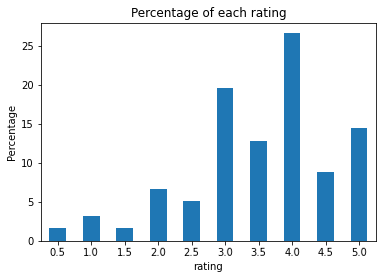

In [10]:
percentage = ratings/numOfRatings*100
print(percentage)
percentage.plot.bar(title='Percentage of each rating', ylabel='Percentage', rot=1)

In [61]:
df_rating.dtypes

userId       int64
movieId      int64
rating     float64
date        object
dtype: object

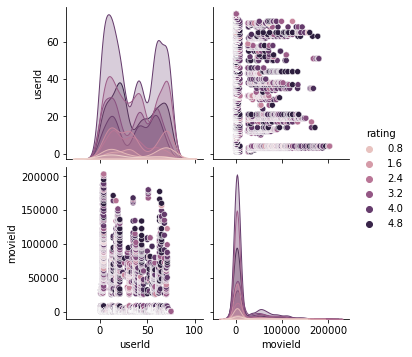

In [59]:
sns.pairplot(data=df_rating[:10000], hue='rating', vars=['userId', 'movieId'])

In [208]:
correlation = df_movies_rating.corr()

<AxesSubplot:>

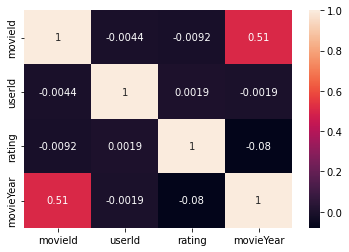

In [209]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

In [56]:
group_by_user = df_rating.groupby('userId')
group_by_movie = df_rating.groupby('movieId')
group_by_date = df_rating.groupby('date')

In [57]:
user = group_by_user['rating'].count()
movie = group_by_movie['rating'].count()
date = group_by_date['rating'].count()

/Users/woody/opt/anaconda3/envs/hoai/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


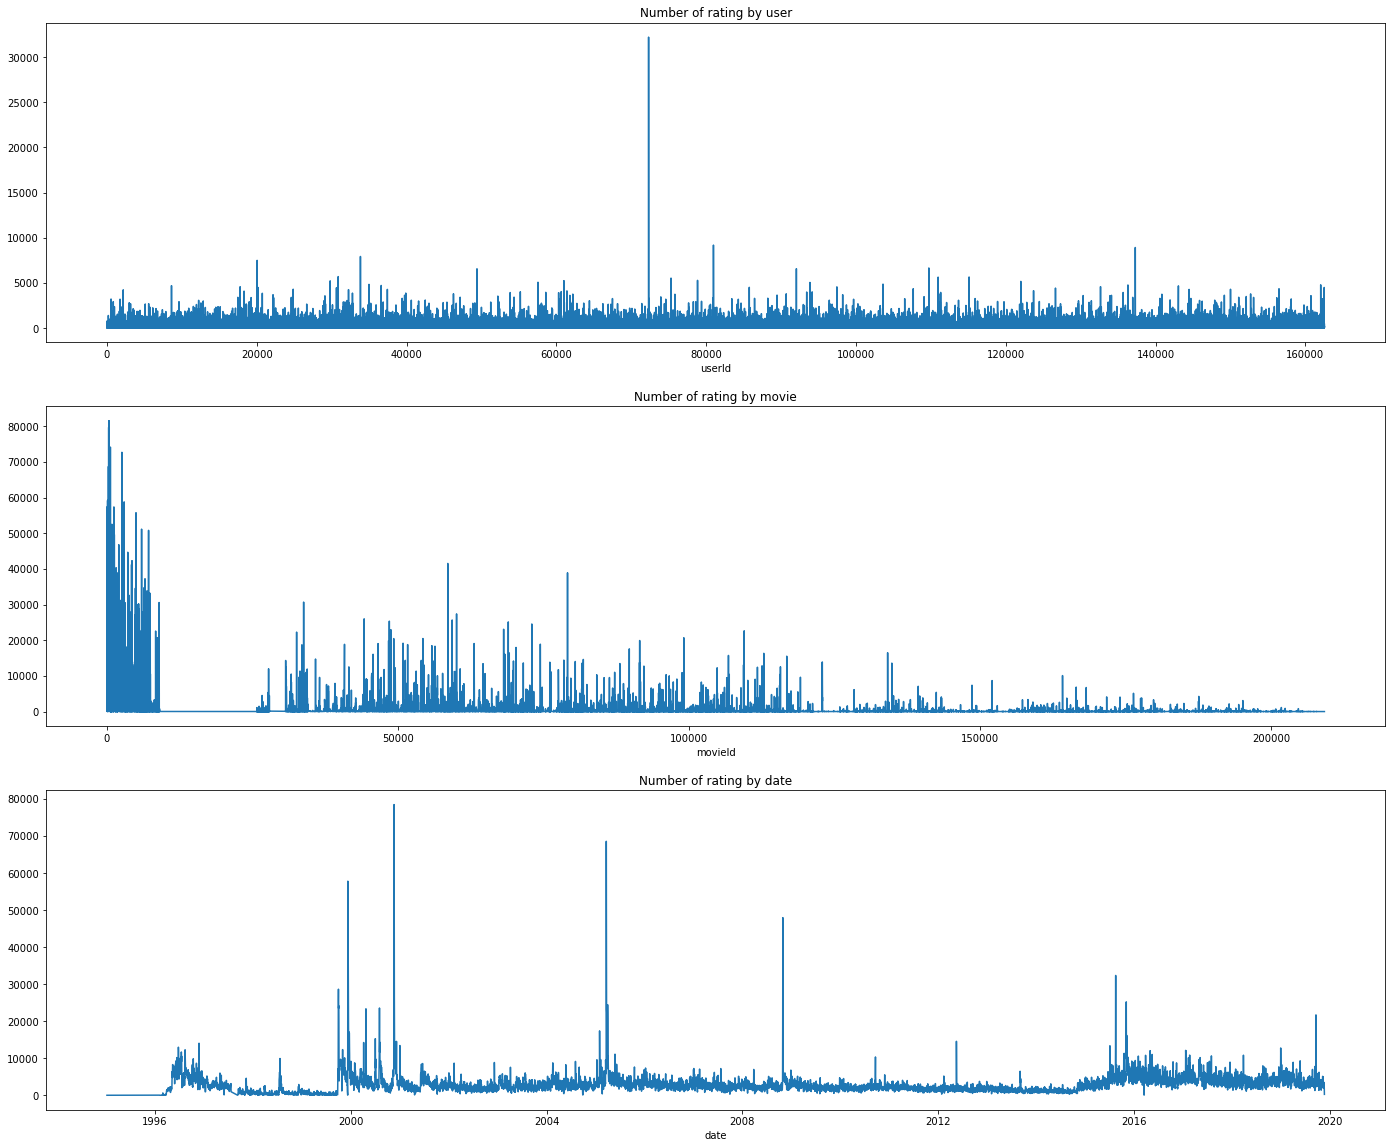

In [58]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(24,20))

user.plot(ax=ax[0])
movie.plot(ax=ax[1])
date.plot(ax=ax[2])

ax[0].set_title('Number of rating by user')
ax[1].set_title('Number of rating by movie')
ax[2].set_title('Number of rating by date')

fig.show()

In [25]:
user.head()

userId
1     70
2    184
3    656
4    242
5    101
Name: rating, dtype: int64

In [30]:
user.describe()

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: rating, dtype: float64

In [ ]:
report = ProfileReport(df_rating)
report